In [1]:
%load_ext autoreload
%autoreload 2

pattern = "pattern-11"

entrypoint = pattern
app_cwl_file = f"../cwl-workflow/{pattern}.cwl"

try:
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys

    module_path = os.path.abspath(os.path.join("."))  # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer, WorkflowWrapper
from cwl_loader import dump_cwl
from pathlib import Path

In [2]:
wf = WorkflowViewer.from_file(app_cwl_file, entrypoint)

2025-09-05 12:03:41.792 | DEBUG    | cwl_loader:load_cwl_from_location:196 - Loading CWL document from ../cwl-workflow/pattern-11.cwl...
2025-09-05 12:03:41.793 | DEBUG    | cwl_loader:_load_cwl_from_stream:199 - Reading stream from ../cwl-workflow/pattern-11.cwl...
2025-09-05 12:03:41.816 | DEBUG    | cwl_loader:load_cwl_from_stream:173 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-05 12:03:41.817 | DEBUG    | cwl_loader:load_cwl_from_yaml:124 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-05 12:03:41.822 | DEBUG    | cwl_loader:load_cwl_from_yaml:135 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-05 12:03:41.833 | DEBUG    | cwl_loader:load_cwl_from_yaml:143 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-09-05 12:03:41.834 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning Workflow pattern-11...
2025-09-05 12:03:41.83

## Application Package Pattern-11

This pattern uses as input a `File` and a `Directory`

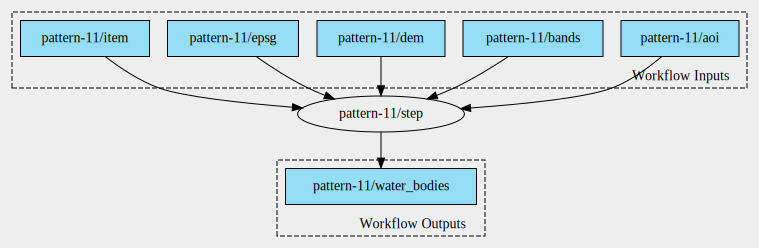

In [3]:
wf.plot()

### Inputs

In [4]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest | area of interest as a bounding box |
| `epsg` | `string` | EPSG code | EPSG code |
| `bands` | `string[]` | bands used for the NDWI | bands used for the NDWI |
| `item` | `Directory` | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |
| `dem` | `File` | Digital Elevation Model (DEM) | Digital Elevation Model (DEM) geotiff |


### Steps

In [5]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | `#clt` | None | None |


### Outputs

In [6]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | `Directory` | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |


## Data flow management

In [7]:
w = WorkflowWrapper(workflow=wf.workflow, entrypoint=entrypoint)
wrapped = w.wrap()

app_cwl_file = f".{entrypoint}.cwl"

with open(app_cwl_file, "w") as f:
    dump_cwl(process=wrapped, stream=f)

2025-09-05 12:03:42.770 | DEBUG    | cwl_loader:load_cwl_from_location:196 - Loading CWL document from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/develop/templates/stage-in.cwl...
2025-09-05 12:03:42.823 | DEBUG    | cwl_loader:_load_cwl_from_stream:199 - Reading stream from https://raw.githubusercontent.com/eoap/application-package-patterns/refs/heads/develop/templates/stage-in.cwl...


2025-09-05 12:03:42.832 | DEBUG    | cwl_loader:load_cwl_from_stream:173 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-05 12:03:42.834 | DEBUG    | cwl_loader:load_cwl_from_yaml:124 - Updating the model of type 'CommentedMap' to version 'v1.2'...
2025-09-05 12:03:42.835 | DEBUG    | cwl_loader:load_cwl_from_yaml:135 - Raw CWL document successfully updated to v1.2! Now converting to the CWL model...
2025-09-05 12:03:43.672 | DEBUG    | cwl_loader:load_cwl_from_yaml:143 - Raw CWL document successfully updated to v1.2! Now dereferencing the FQNs...
2025-09-05 12:03:43.673 | DEBUG    | cwl_loader:_clean_process:66 -   Cleaning CommandLineTool my-asthonishing-stage-in-directory...
2025-09-05 12:03:43.674 | DEBUG    | cwl_loader:load_cwl_from_yaml:151 - CWL document successfully dereferenced!
2025-09-05 12:03:43.675 | DEBUG    | cwl_loader:_load_cwl_from_stream:207 - Stream from https://raw.githubusercontent.com/eoap/application-packag

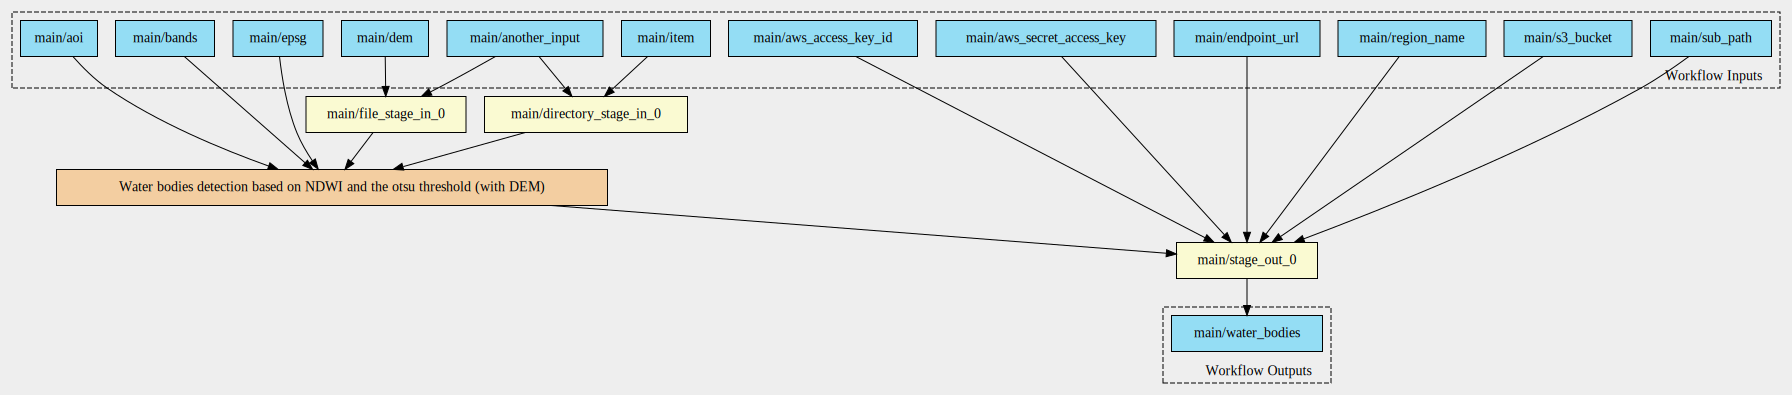

In [8]:
wf = WorkflowViewer(cwl_file=app_cwl_file, workflow=wrapped, entrypoint="main")

wf.plot()

### Workflow components diagram

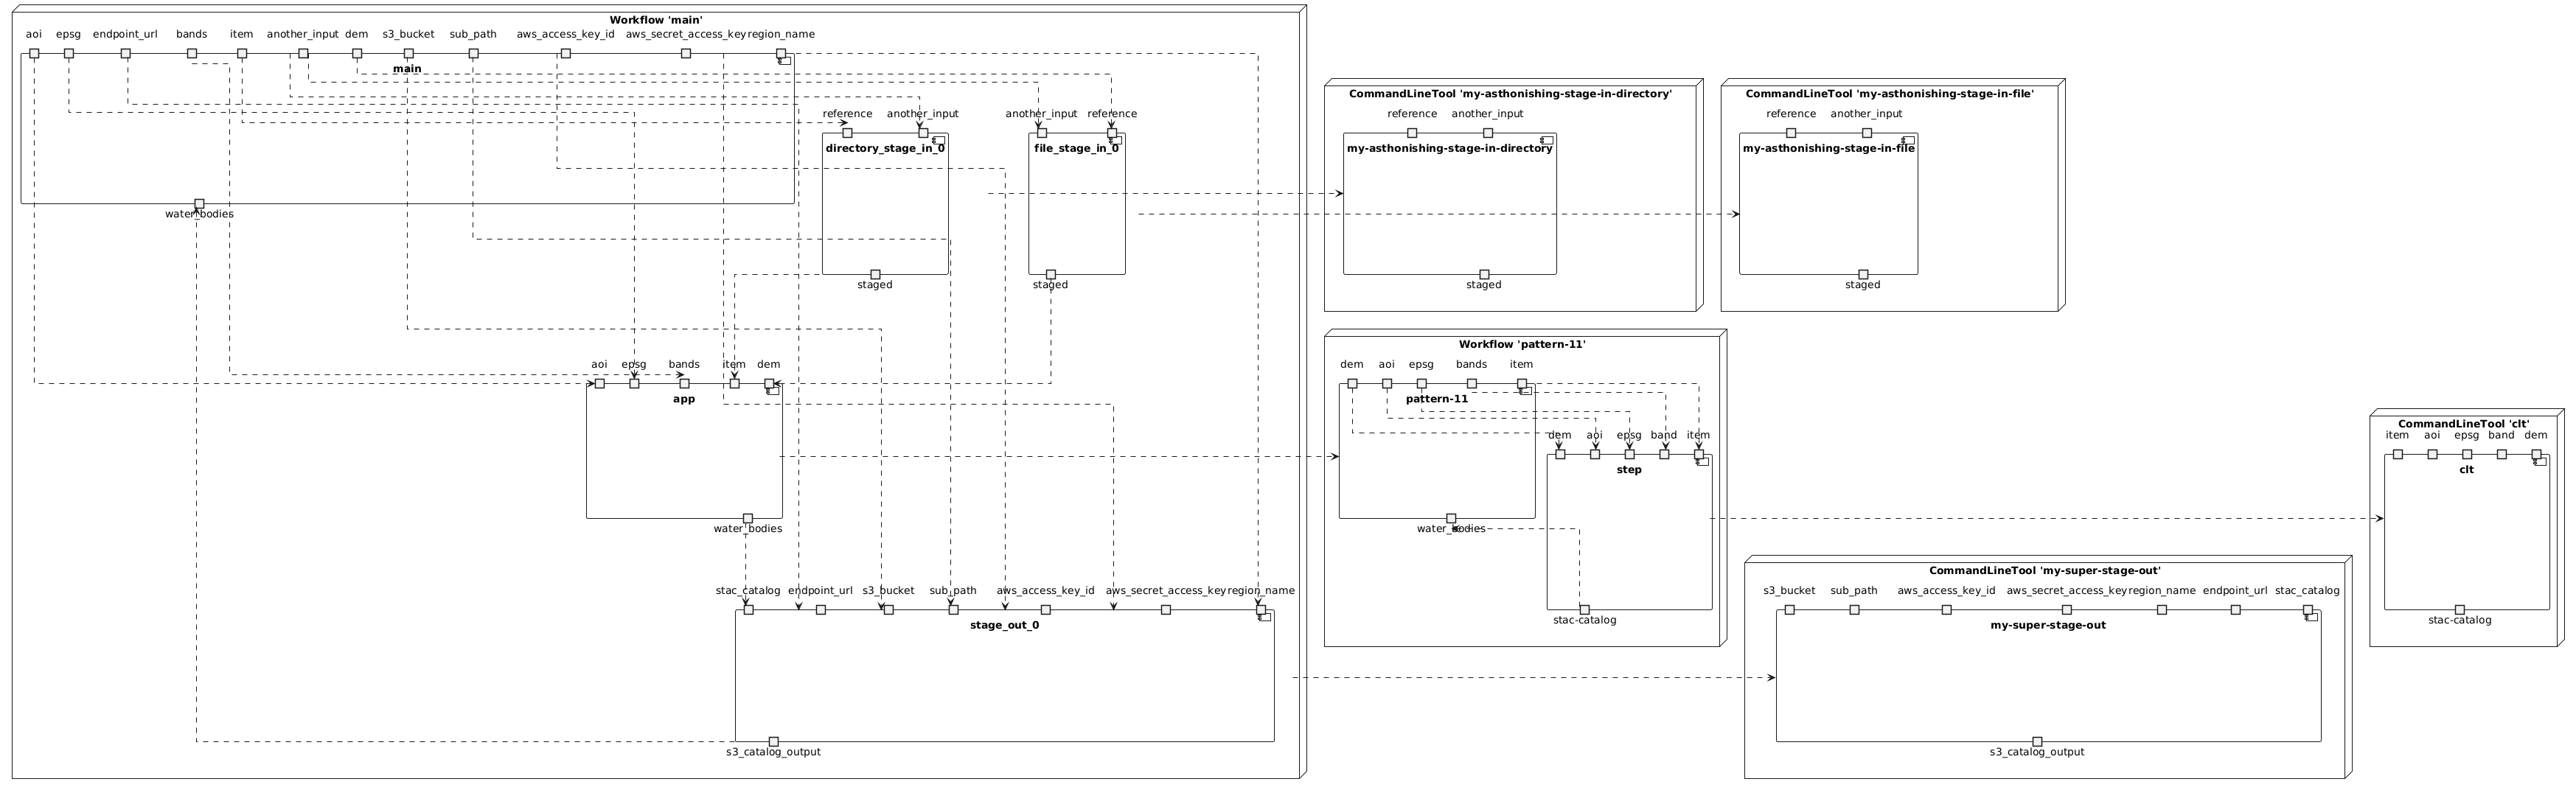

In [9]:
wf.display_components_diagram()

### Inputs

In [10]:
wf.display_inputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | `string` | area of interest - pattern-11/aoi | area of interest as a bounding box - This parameter is derived from pattern-11/aoi |
| `epsg` | `string` | EPSG code - pattern-11/epsg | EPSG code - This parameter is derived from pattern-11/epsg |
| `bands` | `string[]` | bands used for the NDWI - pattern-11/bands | bands used for the NDWI - This parameter is derived from pattern-11/bands |
| `another_input` | `string` | Another Input - my-asthonishing-stage-in-directory/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-directory/another_input |
| `item` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Landsat-8/9 acquisition reference - pattern-11/item | Landsat-8/9 acquisition reference - This parameter is derived from pattern-11/item |
| `another_input` | `string` | Another Input - my-asthonishing-stage-in-file/another_input | An additional input for demonstration purposes - This parameter is derived from my-asthonishing-stage-in-file/another_input |
| `dem` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Digital Elevation Model (DEM) - pattern-11/dem | Digital Elevation Model (DEM) geotiff - This parameter is derived from pattern-11/dem |
| `s3_bucket` | `string` | my-super-stage-out/s3_bucket | This parameter is derived from: my-super-stage-out/s3_bucket |
| `sub_path` | `string` | my-super-stage-out/sub_path | This parameter is derived from: my-super-stage-out/sub_path |
| `aws_access_key_id` | `string` | my-super-stage-out/aws_access_key_id | This parameter is derived from: my-super-stage-out/aws_access_key_id |
| `aws_secret_access_key` | `string` | my-super-stage-out/aws_secret_access_key | This parameter is derived from: my-super-stage-out/aws_secret_access_key |
| `region_name` | `string` | my-super-stage-out/region_name | This parameter is derived from: my-super-stage-out/region_name |
| `endpoint_url` | `string` | my-super-stage-out/endpoint_url | This parameter is derived from: my-super-stage-out/endpoint_url |


### Steps

In [11]:
wf.display_steps()

| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `directory_stage_in_0` | `#my-asthonishing-stage-in-directory` | None | None |
| `file_stage_in_0` | `#my-asthonishing-stage-in-file` | None | None |
| `app` | `#pattern-11` | None | None |
| `stage_out_0` | `#my-super-stage-out` | None | None |


### Outputs

In [12]:
wf.display_outputs()

| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | `https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI` | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |


## Execution


In [13]:
from cwltool.main import main
from io import StringIO
import argparse
import yaml

In [14]:
params = {
    "aoi": "-118.985,38.432,-118.183,38.938",
    "epsg": "EPSG:4326",
    "bands": ["green", "nir08"],
    "item": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/url.yaml#URL",
        "value": "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2/items/LC08_L2SP_042033_20231007_02_T1",
    },
    "dem": {
        "class": "https://raw.githubusercontent.com/eoap/schemas/main/url.yaml#URL",
        "value": "https://elevationeuwest.blob.core.windows.net/copernicus-dem/COP30_hh/Copernicus_DSM_COG_10_N38_00_W119_00_DEM.tif",
    },
}
additional_params = {
    "another_input": "some_value",
    "s3_bucket": "my-bucket",
    "sub_path": "my/sub/path",
    "aws_access_key_id": "test",
    "aws_secret_access_key": "test",
    "region_name": "us-west-1",
    "endpoint_url": "https://s3.us-west-1.amazonaws.com",
}

with open(".params.yaml", "w") as f:
    yaml.dump({**params, **additional_params}, f)

In [15]:
parsed_args = argparse.Namespace(
    podman=False,
    debug=False,
    validate=False,
    outdir="./runs",
    workflow=f"{app_cwl_file}#main",
    job_order=[".params.yaml"],
)

stream_out = StringIO()
stream_err = StringIO()

res = main(
    args=parsed_args,
    stdout=stream_out,
    stderr=stream_err,
)

assert res == 0

print(stream_out.getvalue())

{
    "water_bodies": {
        "value": "s3://my-bucket/my/sub/path-brgifr/catalog.json",
        "type": "https://raw.githubusercontent.com/eoap/schemas/main/string_format.yaml#URI"
    }
}
